In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('open_pubs.csv', header=None)
data.columns = ['fsa_id', 'name', 'address', 'postcode', 'easting', 'northing', 'latitude', 'longitude', 'local_authority']
data.head()

,fsa_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
0,22,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.979340,Babergh
1,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
2,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
3,75,Black Horse,"Lower Street, Stratford St Mary, COLCHESTER",CO7 6JS,622675,-5527598,\N,\N,Babergh
4,76,Black Lion,"Lion Road, Glemsford, SUDBURY",CO10 7RF,622675,-5527598,\N,\N,Babergh


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51331 entries, 0 to 51330
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   fsa_id           51331 non-null  int64 
 1   name             51331 non-null  object
 2   address          51331 non-null  object
 3   postcode         51331 non-null  object
 4   easting          51331 non-null  int64 
 5   northing         51331 non-null  int64 
 6   latitude         51331 non-null  object
 7   longitude        51331 non-null  object
 8   local_authority  51331 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.5+ MB


In [18]:
for col in data:
    print(data[col].value_counts())
    print("-"*50)

22        1
398361    1
398150    1
398151    1
398173    1
         ..
210589    1
210606    1
210617    1
210675    1
597137    1
Name: fsa_id, Length: 51331, dtype: int64
--------------------------------------------------
The Red Lion         197
The Royal Oak        170
Red Lion             131
The Crown Inn        115
The White Hart       103
                    ... 
The Study Room         1
The Snug Micropub      1
The Palatine           1
The Nib                1
Y Tai                  1
Name: name, Length: 36335, dtype: int64
--------------------------------------------------
Uttoxeter Racecourse, Wood Lane, Uttoxeter                10
Butlins Skyline Ltd, Roman Bank, Ingoldmells               9
Linlithgow, West Lothian                                   8
Escape to Freight Island, 11 Baring Street, Manchester     6
Butlins Upper Bognor Road, Bognor Regis, West Sussex       6
                                                          ..
St Marys Parish Centre, Devonshire Road, Ch

In [19]:
data.latitude.value_counts()

\N           767
51.310946     10
52.896164     10
53.178189      9
55.318954      8
            ... 
53.369771      1
53.390799      1
53.371238      1
53.361078      1
53.076638      1
Name: latitude, Length: 46810, dtype: int64

In [20]:
data.longitude.value_counts()

\N           767
-0.655576     12
-1.853894     10
0.349896       9
-2.051721      8
            ... 
-2.734245      1
-2.735554      1
-2.733804      1
-2.735118      1
-3.050512      1
Name: longitude, Length: 46807, dtype: int64

In [21]:
# Replace \N values with NaN
data = data.replace('\\N', np.nan)
# Drop rows with NaN values
data = data.dropna()

In [22]:
data.sample(20)

,fsa_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
50041,584534,Begelly Arms Hotel,"Begelly Arms Hotel New Road, Begelly, Pembroke...",SA68 0YF,211702,207030,51.730275,-4.728049,Pembrokeshire
28166,330899,The Bricklayers Arms,"Whitehill Road, Crowborough, East Sussex",TN6 1JA,551611,130200,51.051143,0.161686,Wealden
19036,231293,Pendle Hippodrome Theatre,"Hippodrome, New Market Street, Colne, Lancashire",BB8 9BJ,388809,440114,53.857121,-2.171623,Pendle
47532,556819,Bar West,"165 Almada Street, Hamilton, Lanarkshire",ML3 0ET,271370,655736,55.777784,-4.052362,South Lanarkshire
18213,222015,Remeniss,"4 - 8 Temple Court, Liverpool, Liverpool",L2 6PY,334470,390441,53.406698,-2.987188,Liverpool
21856,260262,Shoreham Football Club,"Shoreham Football Club Middle Road, Shoreham-b...",BN43 6GA,522546,105508,50.836140,-0.261062,Adur
33614,390202,Marlborough Town Football Club,"Elcot Lane, Marlborough, Wiltshire",SN8 2BG,419686,169121,51.420772,-1.718278,Wiltshire
36341,420109,Springfield Social Club,"Springfield Working Mens Club, 198 Dudley Road...",B65 8PX,396342,287962,52.489559,-2.055300,Sandwell
41247,461853,Tiffanys,"Exchange Buliding, Kingston Upon Hull",HU1 1XW,510035,428749,53.743523,-0.333043,"Kingston upon Hull, City of"
33662,390753,Queens Head,"High Street, Ludgershall, Andover, Wiltshire",SP11 9PZ,426480,150840,51.256123,-1.621941,Wiltshire


In [23]:
data.latitude = data.latitude.astype(float)
data.longitude = data.longitude.astype(float)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50564 entries, 0 to 51330
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fsa_id           50564 non-null  int64  
 1   name             50564 non-null  object 
 2   address          50564 non-null  object 
 3   postcode         50564 non-null  object 
 4   easting          50564 non-null  int64  
 5   northing         50564 non-null  int64  
 6   latitude         50564 non-null  float64
 7   longitude        50564 non-null  float64
 8   local_authority  50564 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 3.9+ MB


### Northing

<Axes: ylabel='northing'>

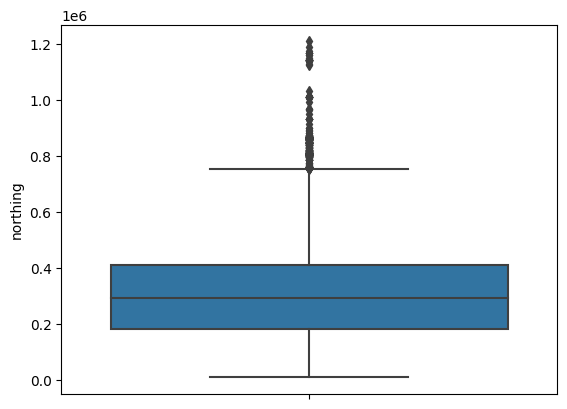

In [25]:
sns.boxplot(data=data, y=data.northing)

<Axes: ylabel='Density'>

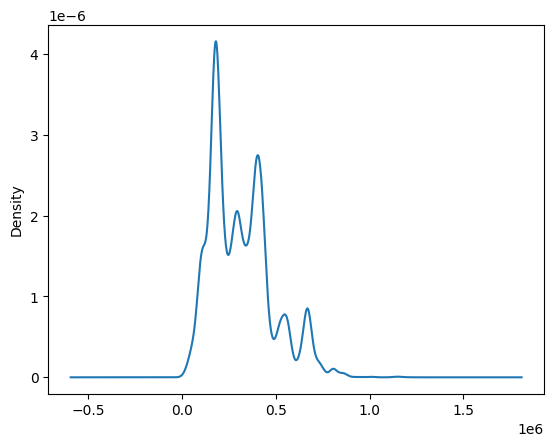

In [26]:
data.northing.plot(kind='kde')

### Easting

<Axes: ylabel='easting'>

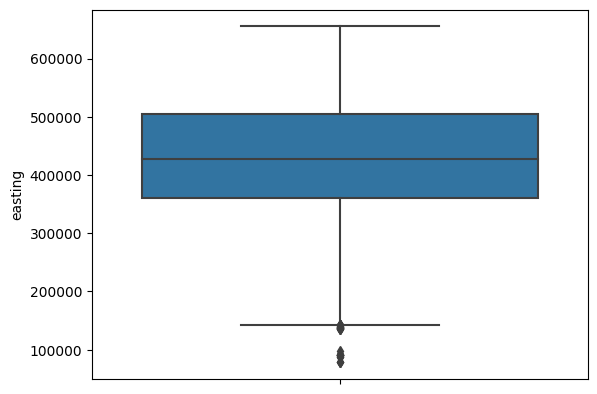

In [27]:
sns.boxplot(data=data, y=data.easting)

<Axes: ylabel='Density'>

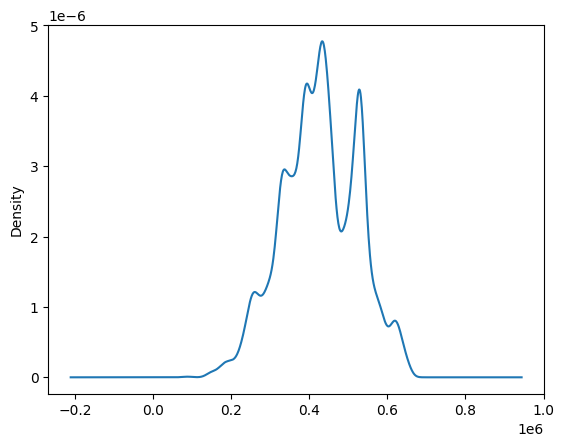

In [28]:
data.easting.plot(kind='kde')

### Latitude

<Axes: ylabel='latitude'>

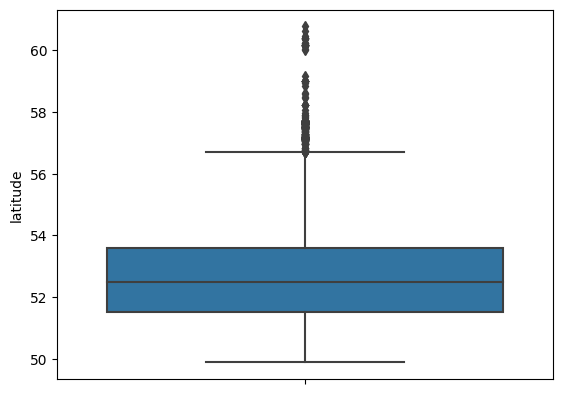

In [29]:
sns.boxplot(data=data, y=data.latitude)

<Axes: ylabel='Density'>

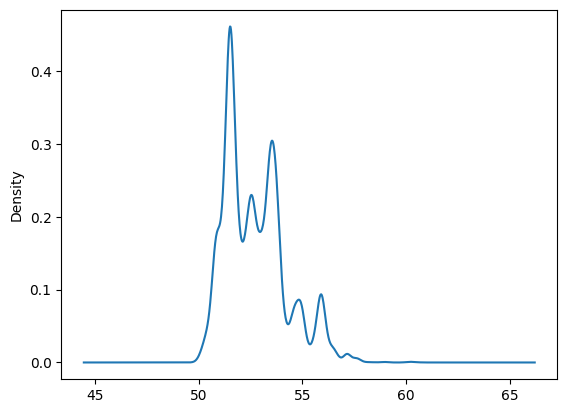

In [30]:
data.latitude.plot(kind='kde')

### Longitude

<Axes: ylabel='longitude'>

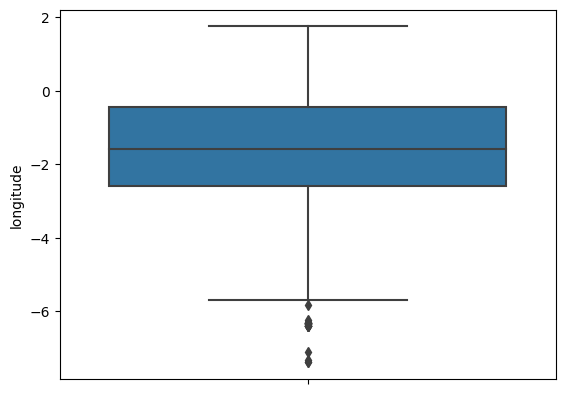

In [31]:
sns.boxplot(data=data, y=data.longitude)

<Axes: ylabel='Density'>

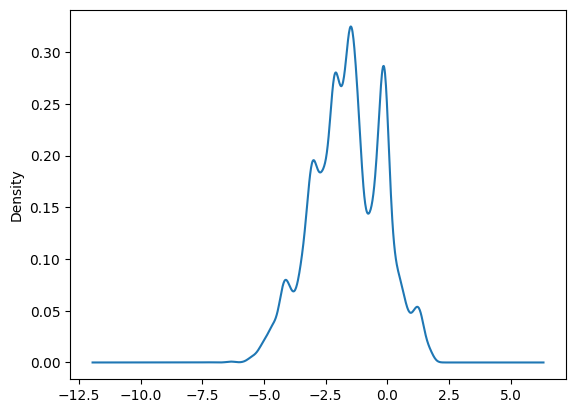

In [32]:
data.longitude.plot(kind='kde')